## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [157]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [158]:
students = pd.read_csv("students-data.csv",sep=";")

In [159]:
students.shape

(395, 33)

In [160]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [161]:
students.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [162]:
students.iloc[0:15,0:20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes


In [163]:
students.iloc[0:15,20:]

,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,yes,yes,no,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [164]:
students =students.dropna()

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [165]:
students.select_dtypes(exclude=["int64","float64"])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [166]:
indexdf = pd.DataFrame(np.var(students))
lowvariancecolumns = list(indexdf[indexdf[0] < 1].index)
stuhighvar = students.drop(lowvariancecolumns,axis=1)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stuhighvar = stuhighvar.apply(le.fit_transform)

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [168]:
def rangeToBin(x):
    if(x >= 10):
        return 1
    else:
        return 0

In [169]:
stuhighvar["G1"] = stuhighvar["G1"].apply(rangeToBin)
stuhighvar["G2"] = stuhighvar["G2"].apply(rangeToBin)
stuhighvar["G3"] = stuhighvar["G3"].apply(rangeToBin)

In [170]:
studentmodified = stuhighvar.copy()

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [171]:
X = studentmodified.drop("G3",axis=1)
y = studentmodified["G3"]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

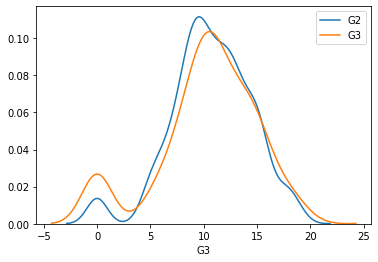

In [172]:
sns.distplot(students['G2'], hist=False, label='G2')
sns.distplot(students['G3'], hist=False, label='G3')
# change graph check1


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

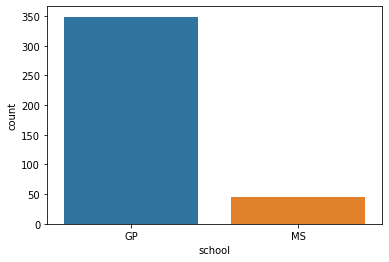

In [173]:
sns.countplot("school",data=students)

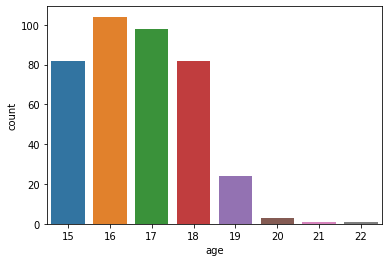

In [174]:
sns.countplot("age",data=students)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [175]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=10)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [176]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
model.score(X_test,y_test)

0.9473684210526315

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
predicted = model.predict(X_test)
print(confusion_matrix(y_test,predicted))

[[65  3]
 [ 2 25]]


In [179]:
print("actuals:",np.unique(np.array(y_test),return_counts=True))
print("predicted:",np.unique(np.array(predicted),return_counts=True))

actuals: (array([0, 1], dtype=int64), array([68, 27], dtype=int64))
predicted: (array([0, 1], dtype=int64), array([67, 28], dtype=int64))


In [180]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.89      0.93      0.91        27

    accuracy                           0.95        95
   macro avg       0.93      0.94      0.94        95
weighted avg       0.95      0.95      0.95        95



# Naive bayes with Iris data

### Import Iris.csv

In [181]:
irisdf = pd.read_csv("iris.csv")

In [182]:
irisdf = irisdf.drop("Id",axis=1)
irisdf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [183]:
irisdf.shape

(150, 5)

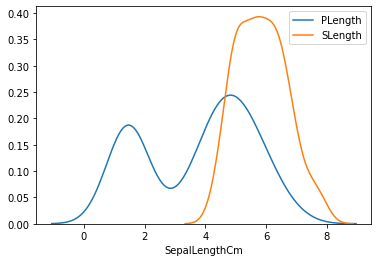

In [184]:
sns.distplot(irisdf["PetalLengthCm"],hist=False,label = "PLength")
sns.distplot(irisdf["SepalLengthCm"],hist=False,label = "SLength")

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
irisdf["Species"] = le.fit_transform(irisdf["Species"])

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [186]:
X = irisdf.drop("Species",axis = 1)
y = irisdf["Species"]

### Find the distribution of target variable (Class)

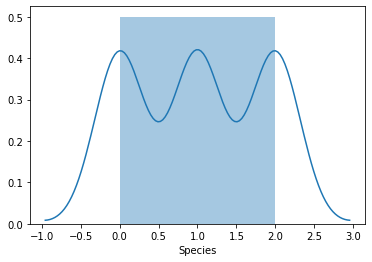

In [187]:
sns.distplot(y)

Looks like all the three classes are equally distributed.

### Plot the distribution of target variable using histogram

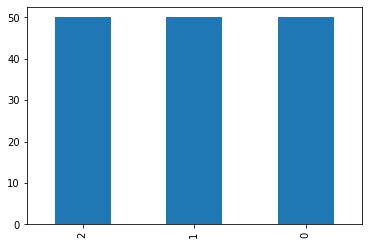

In [188]:
pd.value_counts(irisdf["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

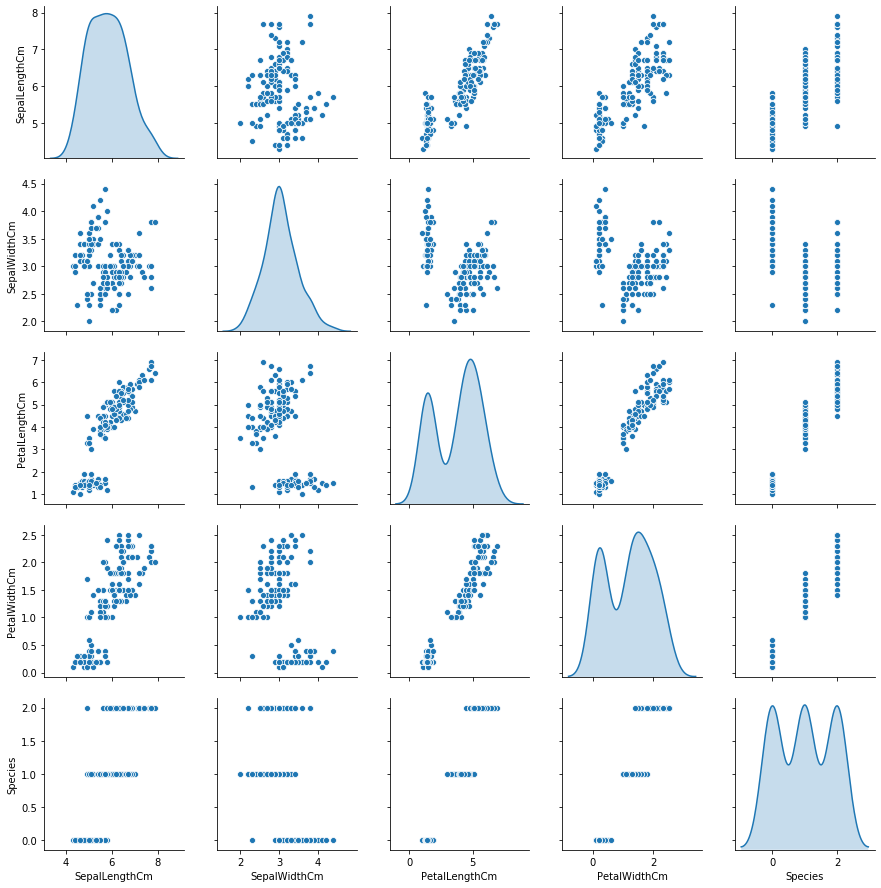

In [189]:
sns.pairplot(irisdf,diag_kind="kde")

Insights:
1. Petal width and petal length looks highly correlated. Hence one of the features can be removed from model input.
2. All the three classes looks equally distributed.
3. Both sepal length and width follows a good gaussian curve. Hence a good input for naive bayes algorithm.
4. Petal length does not follow a good normal curve. Not as good predictor as sepal lebgth and width.

### Summary Statistics and explain insights for at least 2 variables

In [190]:
irisdf.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


1. Petal length have high std deviation, so it is a good input variable and also highly related to target variable as seen above.
2. Sepal length has mean almost same as median, which represents a symmetric curve.

### Correlation among all variables and give your insights

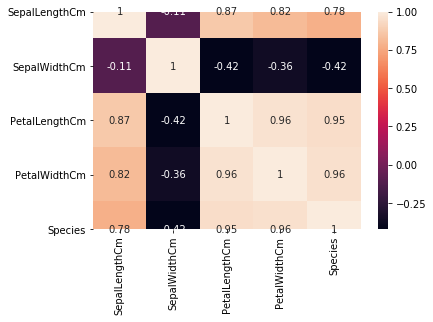

In [191]:
sns.heatmap(irisdf.corr(),annot=True)

1. Correlation of target column with petal length and width is high, so these should be good predictors for the class. But they atr highly correlated among themselves as well. So only one of them should be used. We should use petal width as its correlation is marginally high.
2. Sepal width is least correlated with the target variable.
3. Sepal length and petal length also have good correlation.

### Split data in Training and Validation in 80:20

In [192]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 4)

### Do Feature Scaling

In [193]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_trainscaled = sc.fit_transform(X_train)
X_testscaled = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [194]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_trainscaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [195]:
predicted = model.predict(X_testscaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [196]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(y_test,predicted)
conf_matrix = confusion_matrix(y_test,predicted)

print(acc)
print(conf_matrix)
print(classification_report(y_test,predicted))

0.9666666666666667
[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      1.00      0.91         5
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



1. Overall accuracy is high for the model using all the metrics.
2. Classwise metrics are also good using all the features.
3. Prediction for class 0 and 2 is 100% correct. (precision)
4. Class 2 have some false negatives which is reducing its recall value.

### Iterations try with some feature selection

In [197]:
X = irisdf.drop(["Species","PetalLengthCm","SepalWidthCm","SepalLengthCm"],axis = 1)
y = irisdf["Species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 4)
X_trainscaled = sc.fit_transform(X_train)
X_testscaled = sc.transform(X_test)

model = GaussianNB()
model.fit(X_trainscaled,y_train)

predicted = model.predict(X_testscaled)

acc = accuracy_score(y_test,predicted)
conf_matrix = confusion_matrix(y_test,predicted)

#print(acc)
print(conf_matrix)
print(classification_report(y_test,predicted))

[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      1.00      0.91         5
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



- In the above cell we see that even if we removed all the other features other than "Petal width" model accuracy and predictions dont change. So petal width is the feature which alone can be used for prediction for the values provided.